In [1]:
import zstandard
import json
import numpy as np
import matplotlib.pyplot as plt
import io
import pandas as pd

In [2]:
dctx = zstandard.ZstdDecompressor()
with open("data/20220920T151300Z/output.json.zst", "rb") as f:
    stream_reader = dctx.stream_reader(f)
    text_stream = io.TextIOWrapper(stream_reader, encoding="utf-8")
    agents = json.load(text_stream)


In [3]:
with open("data/20220920T151300Z/behaviours.json.zst", "rb") as f:
    stream_reader = dctx.stream_reader(f)
    text_stream = io.TextIOWrapper(stream_reader, encoding="utf-8")
    behaviours = json.load(text_stream)

In [4]:
with open("data/20220920T151300Z/prs.json.zst", "rb") as f:
    stream_reader = dctx.stream_reader(f)
    text_stream = io.TextIOWrapper(stream_reader, encoding="utf-8")
    prs = json.load(text_stream)

In [5]:
with open("data/20220920T151300Z/beliefs.json.zst", "rb") as f:
    stream_reader = dctx.stream_reader(f)
    text_stream = io.TextIOWrapper(stream_reader, encoding="utf-8")
    beliefs = json.load(text_stream)

In [6]:
np.unique([[a["actions"][str(i)] for a in agents] for i in range(1, 1001)], return_counts=True)

(array(['59b954e3-da71-4ad5-91b6-b7a8a55ec84b',
        '78cfcc29-09ed-4122-bb7a-2e867bed82bc',
        '83908591-344f-4ff6-b018-03138f731a87',
        '98548711-2dc8-45f6-9998-c13fab43b6d4'], dtype='<U36'),
 array([275480,   6861, 212529,   5130]))

In [7]:
behaviours_map = {b["uuid"]: b["name"] for b in behaviours}
behaviours_map

{'83908591-344f-4ff6-b018-03138f731a87': 'Walk',
 '59b954e3-da71-4ad5-91b6-b7a8a55ec84b': 'Cycle',
 '78cfcc29-09ed-4122-bb7a-2e867bed82bc': 'PT',
 '98548711-2dc8-45f6-9998-c13fab43b6d4': 'Drive'}

Mostly Cycle, and Walking, few PT and even fewer Driving? Lack of driving relevant beliefs?

In [8]:
actions = np.array([[behaviours_map[a["actions"][str(i)]] for a in agents] for i in range(1, 1001)])
n_cycle = np.sum(actions == "Cycle", axis=1)
n_walk = np.sum(actions == "Walk", axis=1)
n_drive = np.sum(actions == "Drive", axis=1)
n_pt = np.sum(actions == "PT", axis=1)

In [9]:
df = pd.DataFrame({
    "day": range(1, 1001),
    "cycle": n_cycle,
    "walk": n_walk,
    "drive": n_drive,
    "pt": n_pt
})

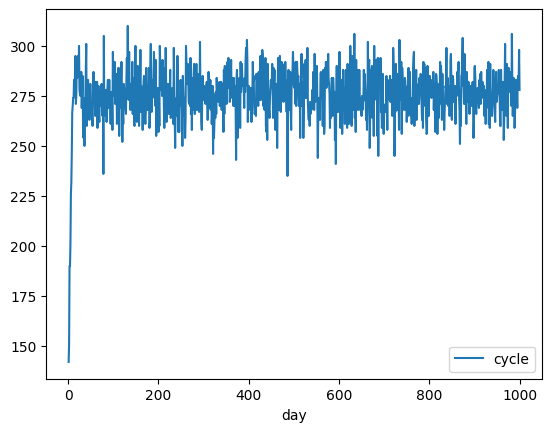

In [10]:
df.plot(x="day", y="cycle", kind="line")
plt.show()

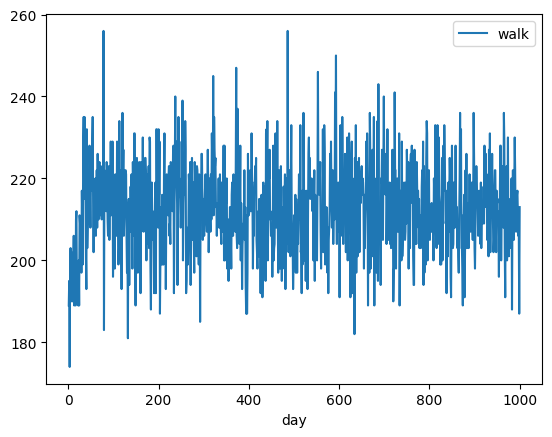

In [11]:
df.plot(x="day", y="walk")
plt.show()

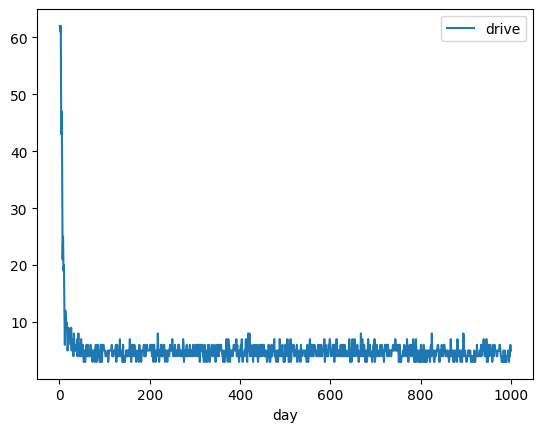

In [12]:
df.plot(x="day", y="drive")
plt.show()

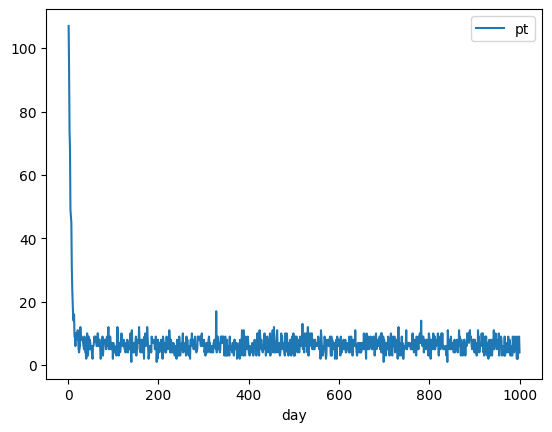

In [13]:
df.plot(x="day", y="pt")
plt.show()